# Battle of the Neighborhoods ( Toronto )

## Business problem statement:
Since Canada has become on the spotlight of young professionals during the last years because of the benefits offered to skilled professionals, my wife and I decided to explore the idea of moving to Toronto looking for quitter life and eventually establish a family, so far we are in the process of paperwork and being optimistic we should be travelling in a couple of months.

However the consequences of a big decision like this involves many aspects to cover, so, with the help of this course, I am going to tackle a problem that come to my mind recently:

**How do we choose the best neighborhood to initially move?**

Given that we do not have previous knowledge of the City, by “initially” I mean that our plan is to rent a place for a couple of months, then eventually move to an area near to our jobs and study centers.

In order to narrow the scope, the neighborhood should meet the following requirements:

* Easy access to public transportation
* Lot of restaurants, since we are not keen on cooking
* Low Crime rates 
* Affordable Rent Prices 
* Things to do in the cornerstones
* Some night life should be welcome



## Required data

1.	Neighborhoods in Toronto - https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
2.	Foursquare data
3.	Neighborhoods Crime data in Toronto - http://data.torontopolice.on.ca/datasets/af500b5abb7240399853b35a2362d0c0_0?geometry=-79.812%2C43.632%2C-78.944%2C43.805&selectedAttribute=Total_Rate 
4.	AirBnb Prices prices - http://insideairbnb.com/get-the-data.html 


## Machine Learning approach

Overall, I will use the data available in the sources to perform a clustering based analysis to find the group that better meet the initial requirements.

It is expected to find one or more clusters with neighborhoods with crime rates under the average, rent prices around the average, with lots of restaurants and with bus/train stations.

Finally, once plotted in a map, it should be easier to decide which cluster is near to the university we are going to study.


## Results

## Summary and Conclusions

In [11]:
#!pip install geocoder

    100% |████████████████████████████████| 102kB 7.6MB/s ta 0:00:01
Requirement not upgraded as not directly required: future in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: click in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from geocoder)
Requirement not upgraded as not directly required: decorator in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from ratelim->geocoder)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from requests->geocoder)
Requirement not upgraded as not directly required: idna<2.7,>=2.5 in /opt/conda/envs/DSX-Pyt

In [12]:
#import geocoder # import geocoder

In [14]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [15]:
#Use geopy library to get the latitude and longitude values of New York City.
address = 'Forest Hill South,Toronto, ON'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Forest Hill South,Toronto, ON are 43.6935586, -79.4139023.


In [16]:
location

Location(Forest Hill, Old Toronto, Toronto, Ontario, M5P2W8, Canada, (43.6935586, -79.4139023, 0.0))

In [17]:
def getLocationByAddress(address):
    address = address + ', Toronto, Ontario'
    geolocator = Nominatim()
    location = geolocator.geocode(address)
    return(location)

def getLatituteByLocation(location):
    if location is None:
        return None
    return(location.latitude)

def getLongitudeByLocation(location):
    if location is None:
        return None
    return(location.longitude)

In [18]:
#location_result = getLocationByAddress('Forest Hill South,Toronto, ON')
location_result = getLocationByAddress('Forest Hill South')

In [19]:
print(location_result.latitude,location_result.longitude)

43.6935586 -79.4139023


In [20]:
print( getLatituteByLocation(location_result) , getLongitudeByLocation(location_result) )

43.6935586 -79.4139023


In [17]:
# The code was removed by Watson Studio for sharing.

,Neighbourhood_Formatted,Total_Rate
0,Mount Pleasant East,226.845357
1,Markland Wood,337.818494
2,Yonge-Eglinton,412.358054
3,Pleasant View,435.878584
4,Caledonia-Fairbank,438.229039


In [22]:
df_CrimeRate['location'] = df_CrimeRate['Neighbourhood_Formatted'].apply(getLocationByAddress)

In [23]:
df_CrimeRate['Latitute'] = df_CrimeRate['location'].apply(getLatituteByLocation)
df_CrimeRate['Longitude'] = df_CrimeRate['location'].apply(getLongitudeByLocation)
df_CrimeRate

,Neighbourhood_Formatted,Total_Rate,location,Latitute,Longitude
0,Mount Pleasant East,226.845357,"(Mount Pleasant, 1, Eglinton Avenue East, Davi...",43.708417,-79.390135
1,Markland Wood,337.818494,"(Markland Wood Golf Club, 245, Markland Drive,...",43.631238,-79.585437
2,Yonge-Eglinton,412.358054,"(Yonge & Eglinton, Old Toronto, Toronto, Ontar...",43.706748,-79.398327
3,Pleasant View,435.878584,"(Pleasant View, North York, Toronto, Ontario, ...",43.787048,-79.333714
4,Caledonia-Fairbank,438.229039,"(Caledonia Road, Fairbank, York, Toronto, Onta...",43.698951,-79.463611
5,Tam O'Shanter-Sullivan,450.852500,None,NaN,NaN
6,Banbury-Don Mills,454.500786,"(Banbury Road, The Bridle Path, North York, To...",43.734804,-79.357243
7,High Park-Swansea,467.289720,"(high park, 1, Colborne Lodge Drive, High Park...",43.645593,-79.465320
8,Leaside-Bennington,477.644278,None,NaN,NaN
9,Pelmo Park-Humberlea,522.445043,"(Pelmo Park Public School, 180, Gary Drive, Hu...",43.712195,-79.517511


In [95]:
#df_CrimeRate.to_csv('df_CrimeRate.csv', sep='\t', encoding='utf-8')

In [34]:
from IPython.display import HTML
import base64

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode()) # base64.b64encode("password".encode("utf-8"))
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [27]:
create_download_link(df_CrimeRate)

In [96]:
df_CrimeRate[df_CrimeRate['location'].isnull()]

,Neighbourhood_Formatted,Total_Rate,location,Latitute,Longitude
5,Tam O'Shanter-Sullivan,450.852500,None,NaN,NaN
8,Leaside-Bennington,477.644278,None,NaN,NaN
19,Westminster-Branson,596.650133,None,NaN,NaN
26,Humewood-Cedarvale,665.228335,None,NaN,NaN
33,Thistletown-Beaumond Heights,748.176320,None,NaN,NaN
34,Rockcliffe-Smythe,754.408289,None,NaN,NaN
37,Willowridge-Martingrove-Richview,793.621901,None,NaN,NaN
38,Weston-Pellam Park,795.939555,None,NaN,NaN
39,Bridle Path-Sunnybrook-York Mills,825.351539,None,NaN,NaN
48,Brookhaven-Amesbury,871.598639,None,NaN,NaN


### Missing Location
I have to manually look for the latitude and longitude, then upload a csv file

In [28]:
body = client_97586aef2fa8417b9ee6c815ac8c60c6.get_object(Bucket='coursera-donotdelete-pr-a1qupkcauivdlw',Key='Toronto-Missing-Location2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_missing_location = pd.read_csv(body,sep=';')
df_missing_location.head()

,Neighbourhood_Formatted,location,Latitute,Longitude
0,Tam O'Shanter-Sullivan,None,43.779314,-79.305308
1,Leaside-Bennington,None,43.701639,-79.373594
2,Westminster-Branson,None,43.776741,-79.451484
3,Humewood-Cedarvale,None,43.692219,-79.426661
4,Thistletown-Beaumond Heights,None,43.737248,-79.565320


In [30]:
df_CrimeRate.head()

,Neighbourhood_Formatted,Total_Rate,location,Latitute,Longitude
0,Mount Pleasant East,226.845357,"(Mount Pleasant, 1, Eglinton Avenue East, Davi...",43.708417,-79.390135
1,Markland Wood,337.818494,"(Markland Wood Golf Club, 245, Markland Drive,...",43.631238,-79.585437
2,Yonge-Eglinton,412.358054,"(Yonge & Eglinton, Old Toronto, Toronto, Ontar...",43.706748,-79.398327
3,Pleasant View,435.878584,"(Pleasant View, North York, Toronto, Ontario, ...",43.787048,-79.333714
4,Caledonia-Fairbank,438.229039,"(Caledonia Road, Fairbank, York, Toronto, Onta...",43.698951,-79.463611


In [43]:
df_Toronto_Crime_temp =  pd.merge(df_CrimeRate, df_missing_location, on='Neighbourhood_Formatted', how='outer')

In [44]:
df_Toronto_Crime_temp['Latitute_x'] = df_Toronto_Crime_temp.apply(    
    lambda row: row['Latitute_y'] if np.isnan(row['Latitute_x']) else row['Latitute_x'],
    axis=1
)

df_Toronto_Crime_temp['Longitude_x'] = df_Toronto_Crime_temp.apply(
    lambda row: row['Longitude_y'] if np.isnan(row['Longitude_x']) else row['Longitude_x'],
    axis=1
)

In [46]:
df_Toronto_Crime = df_Toronto_Crime_temp[['Neighbourhood_Formatted','Total_Rate','Latitute_x','Longitude_x']]

In [47]:
create_download_link(df_Toronto_Crime)

In [1]:
# AirBnb data

# Data pre-processing and feature engineering
# https://towardsdatascience.com/exploring-machine-learning-for-airbnb-listings-in-toronto-efdbdeba2644
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)
listings = listings.loc[(listings.price <= 600) & (listings.price > 0)]

In [3]:
# The code was removed by Watson Studio for sharing.

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.646168,-79.424510,Entire home/apt,469,4,7,2017-12-04,0.17,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.641051,-79.376277,Private room,100,180,170,2013-08-27,1.50,2,365
2,10314,Union Inn II (Leslieville),35505,Douglas & Annie,NaN,South Riverdale,43.670186,-79.335848,Private room,69,1,77,2016-08-18,0.68,1,361
3,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.667241,-79.415978,Private room,67,1,0,NaN,NaN,1,0
4,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.696017,-79.454683,Private room,71,1,206,2018-11-25,1.99,2,358


### Data pre-processing: AirBnb Data
#### Clean outliers


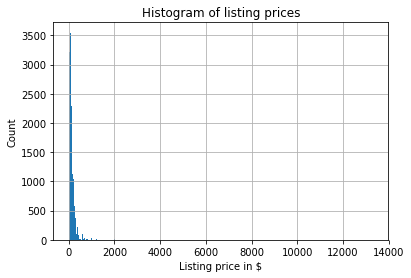

In [18]:
# histogram
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_airbnb_raw['price'].hist(bins=500)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');

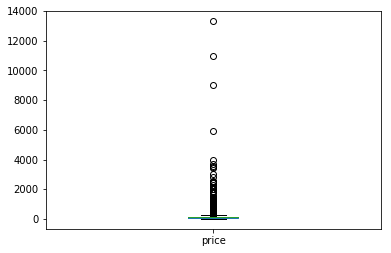

In [9]:
# using boxplot
df_airbnb.boxplot(column=['price'], grid=False)

In [21]:
df_airbnb_raw['price'].describe(percentiles=[.05,.10,.25, .5, .75,.90,.95])

count    19255.000000
mean       139.749935
std        210.438228
min          0.000000
5%          35.000000
10%         43.000000
25%         65.000000
50%        100.000000
75%        158.000000
90%        250.000000
95%        350.000000
max      13315.000000
Name: price, dtype: float64

In [26]:
# 1st attempt to clean outliers
df_airbnb = df_airbnb_raw.loc[(df_airbnb_raw['price'] > 0) & (df_airbnb_raw['price'] < 351)]
print (df_airbnb_raw.shape, df_airbnb.shape)


(19255, 16) (18381, 16)


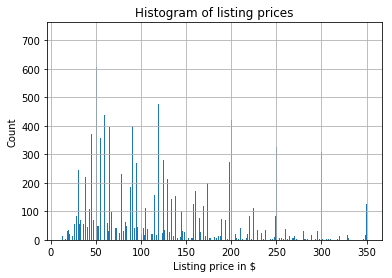

In [27]:
df_airbnb['price'].hist(bins=500)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');

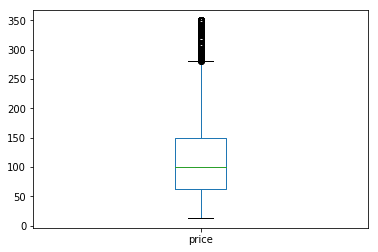

In [28]:
# using boxplot
df_airbnb.boxplot(column=['price'], grid=False)

In [ ]:
# Calculate average price per Crime Zone
# 1- Match map zone vs listing price
# 1.1 - Use the Latitute and Longitude
# 2- Calculate average


In [20]:
body = client_97586aef2fa8417b9ee6c815ac8c60c6.get_object(Bucket='coursera-donotdelete-pr-a1qupkcauivdlw',Key='df_Toronto_Crime.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_Toronto_Crime = pd.read_csv(body)
df_Toronto_Crime.head()



,Unnamed: 0,Neighbourhood_Formatted,Total_Rate,Latitute_x,Longitude_x
0,0,Mount Pleasant East,226.845357,43.708417,-79.390135
1,1,Markland Wood,337.818494,43.631238,-79.585437
2,2,Yonge-Eglinton,412.358054,43.706748,-79.398327
3,3,Pleasant View,435.878584,43.787048,-79.333714
4,4,Caledonia-Fairbank,438.229039,43.698951,-79.463611


In [63]:
from operator import itemgetter

def getCrimeNeighborhoodByLatLong(location):
    #coords_1 = (latitude,longitude)
    coords_1 = (location[0],location[1])
    
    list_Neighborhoods = []
    
    for index,row in df_Toronto_Crime.iterrows():
        coords_2 = (row['Latitute_x'],row['Longitude_x'])
        distance_km = geopy.distance.vincenty(coords_1, coords_2).km
        if distance_km < 10:
            element = (row['Neighbourhood_Formatted'],distance_km)
            list_Neighborhoods.append(element)
            
    if len(list_Neighborhoods) > 0:
        list_Neighborhoods_sorted = sorted(list_Neighborhoods,key=itemgetter(1),reverse=False) #reverse=False to sort asc
        return(list_Neighborhoods_sorted[0]) #return the 1st element, then the item 1 of the tuple

# getCrimeNeighborhoodByLatLong(43.698951,-79.463611) # --> Caledonia-Fairbank
#getCrimeNeighborhoodByLatLong((43.698951,-79.463611)) # --> Caledonia-Fairbank

('Caledonia-Fairbank', 4.444254624153629e-05)

In [67]:
#df_airbnb['location'] = (df_airbnb['latitude'],df_airbnb['longitude'])
df_airbnb['location'] = df_airbnb.apply(    
    lambda row: (row['latitude'],row['longitude']),
    axis=1
)
df_airbnb.head() 

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,location
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.641051,-79.376277,Private room,100,180,170,2013-08-27,1.50,2,365,"(43.64105126982716, -79.37627700577788)"
2,10314,Union Inn II (Leslieville),35505,Douglas & Annie,NaN,South Riverdale,43.670186,-79.335848,Private room,69,1,77,2016-08-18,0.68,1,361,"(43.670185503701774, -79.33584783585275)"
3,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.667241,-79.415978,Private room,67,1,0,NaN,NaN,1,0,"(43.66724068610337, -79.41597756109105)"
4,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.696017,-79.454683,Private room,71,1,206,2018-11-25,1.99,2,358,"(43.69601674127723, -79.4546827470826)"
5,26654,"World Class downtown@ CN Tower! Jays, TIFF, ACC",113345,Adela,NaN,Waterfront Communities-The Island,43.645305,-79.389404,Entire home/apt,198,5,35,2018-10-23,0.36,7,351,"(43.64530469992652, -79.3894036218733)"


In [69]:
#df_CrimeRate['location'] = df_CrimeRate['Neighbourhood_Formatted'].apply(getLocationByAddress)
df_airbnb['CrimeNeighborhood'] = df_airbnb['location'].apply(getCrimeNeighborhoodByLatLong)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [70]:
df_airbnb.head() 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,location,CrimeNeighborhood
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.641051,-79.376277,Private room,100,180,170,2013-08-27,1.50,2,365,"(43.64105126982716, -79.37627700577788)","(Waterfront Communities-The Island, 0.18270934..."
2,10314,Union Inn II (Leslieville),35505,Douglas & Annie,NaN,South Riverdale,43.670186,-79.335848,Private room,69,1,77,2016-08-18,0.68,1,361,"(43.670185503701774, -79.33584783585275)","(Blake-Jones, 0.7557807294730221)"
3,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.667241,-79.415978,Private room,67,1,0,NaN,NaN,1,0,"(43.66724068610337, -79.41597756109105)","(Annex, 0.7931420999069179)"
4,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.696017,-79.454683,Private room,71,1,206,2018-11-25,1.99,2,358,"(43.69601674127723, -79.4546827470826)","(Caledonia-Fairbank, 0.7901059369485557)"
5,26654,"World Class downtown@ CN Tower! Jays, TIFF, ACC",113345,Adela,NaN,Waterfront Communities-The Island,43.645305,-79.389404,Entire home/apt,198,5,35,2018-10-23,0.36,7,351,"(43.64530469992652, -79.3894036218733)","(Waterfront Communities-The Island, 0.97863431..."


In [79]:
df_airbnb['Neighbourhood_Formatted'] = df_airbnb.apply(    
    lambda row: row['CrimeNeighborhood'][0],
    axis=1
)

df_airbnb['CrimeNeighborhood_Distance_KM'] = df_airbnb.apply(    
    lambda row: row['CrimeNeighborhood'][1],
    axis=1
).head()
#df_airbnb.head() 

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [82]:
df_airbnb_prices = df_airbnb.groupby(['Neighbourhood_Formatted'])['price'].mean()

In [86]:
df_airbnb_prices = pd.DataFrame(df_airbnb_prices)

In [87]:
type(df_airbnb_prices)

pandas.core.frame.DataFrame

In [96]:
#df_airbnb_prices.head()
create_download_link(df_airbnb_prices)

In [21]:

body = client_97586aef2fa8417b9ee6c815ac8c60c6.get_object(Bucket='coursera-donotdelete-pr-a1qupkcauivdlw',Key='df_airbnb_prices.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_airbnb_prices = pd.read_csv(body)
df_airbnb_prices.head()



,Neighbourhood_Formatted,price
0,Agincourt North,69.466667
1,Agincourt South-Malvern West,64.948276
2,Alderwood,97.289474
3,Annex,108.677570
4,Banbury-Don Mills,101.971429


In [71]:
df_Toronto_Crime.head()

,Unnamed: 0,Neighbourhood_Formatted,Total_Rate,Latitute_x,Longitude_x
0,0,Mount Pleasant East,226.845357,43.708417,-79.390135
1,1,Markland Wood,337.818494,43.631238,-79.585437
2,2,Yonge-Eglinton,412.358054,43.706748,-79.398327
3,3,Pleasant View,435.878584,43.787048,-79.333714
4,4,Caledonia-Fairbank,438.229039,43.698951,-79.463611


In [72]:
df_Toronto_Crime_AirBnb = df_Toronto_Crime.merge(df_airbnb_prices,on='Neighbourhood_Formatted', how='inner')
#df_Toronto_Crime_temp =  pd.merge(df_CrimeRate, df_missing_location, on='Neighbourhood_Formatted', how='outer')
df_Toronto_Crime_AirBnb.head()

,Unnamed: 0,Neighbourhood_Formatted,Total_Rate,Latitute_x,Longitude_x,price
0,0,Mount Pleasant East,226.845357,43.708417,-79.390135,95.087302
1,1,Markland Wood,337.818494,43.631238,-79.585437,79.666667
2,2,Yonge-Eglinton,412.358054,43.706748,-79.398327,125.971193
3,3,Pleasant View,435.878584,43.787048,-79.333714,65.204225
4,4,Caledonia-Fairbank,438.229039,43.698951,-79.463611,54.600000


In [73]:
print( df_Toronto_Crime.shape, df_Toronto_Crime_AirBnb.shape)

(140, 5) (132, 6)


In [74]:
df_Toronto_Crime_AirBnb.head()

,Unnamed: 0,Neighbourhood_Formatted,Total_Rate,Latitute_x,Longitude_x,price
0,0,Mount Pleasant East,226.845357,43.708417,-79.390135,95.087302
1,1,Markland Wood,337.818494,43.631238,-79.585437,79.666667
2,2,Yonge-Eglinton,412.358054,43.706748,-79.398327,125.971193
3,3,Pleasant View,435.878584,43.787048,-79.333714,65.204225
4,4,Caledonia-Fairbank,438.229039,43.698951,-79.463611,54.600000


In [75]:
# Rename columns
df_Toronto_Crime_AirBnb.drop('Unnamed: 0', axis=1, inplace=True)

df_Toronto_Crime_AirBnb.rename(
    columns={'Latitute_x': 'Neighbourhood_Latitute'
             , 'Longitude_x': 'Neighbourhood_Longitude'             
             , 'Total_Rate': 'Neighbourhood_Total_Crime_Rate'
             , 'price': 'Airbnb_Avg_Price'             
            }
    , inplace=True)

df_Toronto_Crime_AirBnb.head()

,Neighbourhood_Formatted,Neighbourhood_Total_Crime_Rate,Neighbourhood_Latitute,Neighbourhood_Longitude,Airbnb_Avg_Price
0,Mount Pleasant East,226.845357,43.708417,-79.390135,95.087302
1,Markland Wood,337.818494,43.631238,-79.585437,79.666667
2,Yonge-Eglinton,412.358054,43.706748,-79.398327,125.971193
3,Pleasant View,435.878584,43.787048,-79.333714,65.204225
4,Caledonia-Fairbank,438.229039,43.698951,-79.463611,54.600000


In [170]:
df_Toronto_Crime_AirBnb.shape

(132, 5)

## Explore the neighborhoods in Toronto for previous data


In [76]:
#Use geopy library to get the latitude and longitude values of Toronto City.
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [77]:
# The code was removed by Watson Studio for sharing.

In [81]:
import requests
def getNearbyVenues(names, latitudes, longitudes):
    radius = 1000 # 1000 meters of distance, 1km
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        try:            
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except:
            print ('****************************ERROR*****************************')
            print (url)
            #traceback.print_exc()

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Get all places in 1km

In [82]:
toronto_venues = getNearbyVenues(names = df_Toronto_Crime_AirBnb['Neighbourhood_Formatted'],
                                   latitudes = df_Toronto_Crime_AirBnb['Neighbourhood_Latitute'],
                                   longitudes = df_Toronto_Crime_AirBnb['Neighbourhood_Longitude']
                                  )

Mount Pleasant East
Markland Wood
Yonge-Eglinton
Pleasant View
Caledonia-Fairbank
Tam O'Shanter-Sullivan
Banbury-Don Mills
High Park-Swansea
Leaside-Bennington
Pelmo Park-Humberlea
Guildwood
Forest Hill South
Maple Leaf
Oakwood Village
Casa Loma
Steeles
Lawrence Park South
Rouge
Centennial Scarborough
Westminster-Branson
The Beaches
Agincourt North
Runnymede-Bloor West Village
Willowdale East
Dufferin Grove
Bayview Village
Humewood-Cedarvale
Old East York
Clanton Park
South Parkdale
Englemount-Lawrence
Humber Heights-Westmount
Thistletown-Beaumond Heights
Rockcliffe-Smythe
Don Valley Village
Long Branch
Willowridge-Martingrove-Richview
Weston-Pellam Park
Bridle Path-Sunnybrook-York Mills
Edenbridge-Humber Valley
Broadview North
Danforth East York
Cabbagetown-South St.James Town
O'Connor-Parkview
Stonegate-Queensway
Flemingdon Park
Hillcrest Village
Brookhaven-Amesbury
Princess-Rosethorn
Islington-City Centre West
Morningside
Little Portugal
Agincourt South-Malvern West
Milliken
Parkwoo

In [83]:
toronto_venues.shape

(5385, 7)

In [84]:
toronto_venues.head()

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mount Pleasant East,43.708417,-79.390135,Istanbul Cafe & Espresso Bar,43.707891,-79.393049,Café
1,Mount Pleasant East,43.708417,-79.390135,La Carnita,43.707533,-79.394500,Taco Place
2,Mount Pleasant East,43.708417,-79.390135,Loblaws,43.707412,-79.394909,Supermarket
3,Mount Pleasant East,43.708417,-79.390135,Thobors Boulangerie Patisserie Café,43.704514,-79.388616,Café
4,Mount Pleasant East,43.708417,-79.390135,Copacabana Brazilian Steakhouse,43.707748,-79.393766,Churrascaria


In [85]:
create_download_link(toronto_venues,'toronto_venues.csv')

### Filter neighborhoods that contains at least one station (Bus, metro or train)

In [124]:
toronto_venues.head()

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mount Pleasant East,43.708417,-79.390135,Istanbul Cafe & Espresso Bar,43.707891,-79.393049,Café
1,Mount Pleasant East,43.708417,-79.390135,La Carnita,43.707533,-79.394500,Taco Place
2,Mount Pleasant East,43.708417,-79.390135,Loblaws,43.707412,-79.394909,Supermarket
3,Mount Pleasant East,43.708417,-79.390135,Thobors Boulangerie Patisserie Café,43.704514,-79.388616,Café
4,Mount Pleasant East,43.708417,-79.390135,Copacabana Brazilian Steakhouse,43.707748,-79.393766,Churrascaria


In [125]:
toronto_valid_Neighbourhood_temp = toronto_venues[toronto_venues['Venue Category'].str.contains("Bus Line|Bus Station|Bus Stop|Light Rail Station|Metro Station|Train Station")==True]#['Neighbourhood']

In [126]:
toronto_valid_Neighbourhood_temp.head()

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
178,Pleasant View,43.787048,-79.333714,TTC #Stop 2502/3,43.792240,-79.335834,Bus Station
296,High Park-Swansea,43.645593,-79.465319,TTC High Park Loop,43.648191,-79.457575,Light Rail Station
298,High Park-Swansea,43.645593,-79.465319,TTC Bus #77 Swansea,43.645189,-79.475384,Bus Line
299,High Park-Swansea,43.645593,-79.465319,TTC Stop #14281,43.637932,-79.465802,Bus Stop
303,High Park-Swansea,43.645593,-79.465319,TTC Stop #14395,43.637279,-79.469424,Light Rail Station


In [127]:
# remove duplicates
toronto_valid_Neighbourhood = pd.DataFrame({'count' : toronto_valid_Neighbourhood_temp.groupby( [ "Neighbourhood"] ).size()}).reset_index()

In [129]:
toronto_valid_Neighbourhood.head()

,Neighbourhood,count
0,Bayview Village,2
1,Bendale,1
2,Black Creek,1
3,Briar Hill-Belgravia,1
4,Broadview North,2


In [132]:
toronto_valid_Neighbourhood.shape

(48, 2)

In [138]:
toronto_venues.head()

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mount Pleasant East,43.708417,-79.390135,Istanbul Cafe & Espresso Bar,43.707891,-79.393049,Café
1,Mount Pleasant East,43.708417,-79.390135,La Carnita,43.707533,-79.394500,Taco Place
2,Mount Pleasant East,43.708417,-79.390135,Loblaws,43.707412,-79.394909,Supermarket
3,Mount Pleasant East,43.708417,-79.390135,Thobors Boulangerie Patisserie Café,43.704514,-79.388616,Café
4,Mount Pleasant East,43.708417,-79.390135,Copacabana Brazilian Steakhouse,43.707748,-79.393766,Churrascaria


In [139]:
toronto_venues_valid = toronto_valid_Neighbourhood.merge(toronto_venues, on='Neighbourhood', how = 'inner')

In [141]:
toronto_venues_valid.shape

(1760, 8)

### Analyze Each Neighborhood

In [154]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues_valid[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues_valid['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Zoo Exhibit,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Zoo Exhibit,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Bayview Village,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,Bendale,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,Black Creek,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,Briar Hill-Belgravia,0.0,0.0,0.00000,0.0,0.030303,0.0,0.030303,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,Broadview North,0.0,0.0,0.01087,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021739,0.0


### Top 10 venues into a dataframe

In [157]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [158]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview Village,Coffee Shop,Furniture / Home Store,Café,Park,Metro Station,Chinese Restaurant,Bank,Moving Target,Shoe Store,Fish Market
1,Bendale,Bank,Fast Food Restaurant,Grocery Store,Pizza Place,Pharmacy,Coffee Shop,Chinese Restaurant,Caribbean Restaurant,Dog Run,Sandwich Place
2,Black Creek,Coffee Shop,Grocery Store,Fast Food Restaurant,Bus Line,Sandwich Place,Pizza Place,Cuban Restaurant,Eastern European Restaurant,Fish Market,Fish & Chips Shop
3,Briar Hill-Belgravia,Furniture / Home Store,Fast Food Restaurant,Grocery Store,Sandwich Place,Bus Stop,Latin American Restaurant,Bike Shop,Paintball Field,Mediterranean Restaurant,Photography Lab
4,Broadview North,Greek Restaurant,Coffee Shop,Pub,Fast Food Restaurant,Café,Pizza Place,Ice Cream Shop,Bakery,Pharmacy,Bookstore


In [171]:
neighborhoods_venues_sorted.shape

(48, 11)

### Cluster Neighborhoods

In [172]:
df_Toronto_Crime_temp.shape

(132, 6)

In [159]:
df_Toronto_Crime_temp.head()

,Neighbourhood_Formatted,Neighbourhood_Total_Crime_Rate,Neighbourhood_Latitute,Neighbourhood_Longitude,Neighbourhood_Avg_Price,Cluster Labels
0,Mount Pleasant East,226.845357,43.708417,-79.390135,95.087302,0
1,Markland Wood,337.818494,43.631238,-79.585437,79.666667,0
2,Yonge-Eglinton,412.358054,43.706748,-79.398327,125.971193,0
3,Pleasant View,435.878584,43.787048,-79.333714,65.204225,1
4,Caledonia-Fairbank,438.229039,43.698951,-79.463611,54.600000,0


In [174]:
# Merge datasets
toronto_grouped_merge = pd.merge(toronto_grouped, df_Toronto_Crime_AirBnb, left_on = 'Neighborhood', right_on = 'Neighbourhood_Formatted', how = 'inner')

In [175]:
toronto_grouped_merge.head()

,Neighborhood,Zoo Exhibit,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,...,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo,Neighbourhood_Formatted,Neighbourhood_Total_Crime_Rate,Neighbourhood_Latitute,Neighbourhood_Longitude,Airbnb_Avg_Price
0,Bayview Village,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,Bayview Village,664.032265,43.769197,-79.376662,80.209091
1,Bendale,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,Bendale,1174.461921,43.753520,-79.255336,72.000000
2,Black Creek,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,Black Creek,2360.651934,43.695400,-79.485495,103.333333
3,Briar Hill-Belgravia,0.0,0.0,0.00000,0.0,0.030303,0.0,0.030303,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,Briar Hill-Belgravia,4746.281715,43.705611,-79.452926,79.434783
4,Broadview North,0.0,0.0,0.01087,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.021739,0.0,Broadview North,832.326487,43.683924,-79.356964,102.463415


In [176]:
toronto_grouped_merge.shape

(48, 228)

In [178]:
# Clean columns not used in clustering
columns_delete = ['Neighborhood','Neighbourhood_Formatted','Neighbourhood_Latitute','Neighbourhood_Longitude']

toronto_grouped_clustering =  toronto_grouped_merge.drop(columns_delete,1)

toronto_grouped_clustering.head()


,Zoo Exhibit,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio,Zoo,Neighbourhood_Total_Crime_Rate,Airbnb_Avg_Price
0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,664.032265,80.209091
1,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1174.461921,72.000000
2,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2360.651934,103.333333
3,0.0,0.0,0.00000,0.0,0.030303,0.0,0.030303,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,4746.281715,79.434783
4,0.0,0.0,0.01087,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.021739,0.0,832.326487,102.463415


In [199]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 4

In [200]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 1, 2, 0, 3, 3, 0, 3, 1], dtype=int32)

In [201]:
#Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
##

toronto_merged = toronto_grouped_merge # df_Toronto_Crime_temp
# add clustering labels
toronto_merged['Cluster Labels'] = kmeans.labels_
toronto_merged.head()

,Neighborhood,Zoo Exhibit,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,...,Wings Joint,Women's Store,Yoga Studio,Zoo,Neighbourhood_Formatted,Neighbourhood_Total_Crime_Rate,Neighbourhood_Latitute,Neighbourhood_Longitude,Airbnb_Avg_Price,Cluster Labels
0,Bayview Village,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,Bayview Village,664.032265,43.769197,-79.376662,80.209091,0
1,Bendale,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,Bendale,1174.461921,43.753520,-79.255336,72.000000,3
2,Black Creek,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,Black Creek,2360.651934,43.695400,-79.485495,103.333333,1
3,Briar Hill-Belgravia,0.0,0.0,0.00000,0.0,0.030303,0.0,0.030303,0.0,0.0,...,0.0,0.0,0.000000,0.0,Briar Hill-Belgravia,4746.281715,43.705611,-79.452926,79.434783,2
4,Broadview North,0.0,0.0,0.01087,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.021739,0.0,Broadview North,832.326487,43.683924,-79.356964,102.463415,0


In [203]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood_Formatted')

toronto_merged.head() # check the last columns!

,Neighborhood,Zoo Exhibit,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview Village,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,Coffee Shop,Furniture / Home Store,Café,Park,Metro Station,Chinese Restaurant,Bank,Moving Target,Shoe Store,Fish Market
1,Bendale,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,Bank,Fast Food Restaurant,Grocery Store,Pizza Place,Pharmacy,Coffee Shop,Chinese Restaurant,Caribbean Restaurant,Dog Run,Sandwich Place
2,Black Creek,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,Coffee Shop,Grocery Store,Fast Food Restaurant,Bus Line,Sandwich Place,Pizza Place,Cuban Restaurant,Eastern European Restaurant,Fish Market,Fish & Chips Shop
3,Briar Hill-Belgravia,0.0,0.0,0.00000,0.0,0.030303,0.0,0.030303,0.0,0.0,...,Furniture / Home Store,Fast Food Restaurant,Grocery Store,Sandwich Place,Bus Stop,Latin American Restaurant,Bike Shop,Paintball Field,Mediterranean Restaurant,Photography Lab
4,Broadview North,0.0,0.0,0.01087,0.0,0.000000,0.0,0.000000,0.0,0.0,...,Greek Restaurant,Coffee Shop,Pub,Fast Food Restaurant,Café,Pizza Place,Ice Cream Shop,Bakery,Pharmacy,Bookstore


## Finally, let's visualize the resulting clusters

In [204]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [205]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#### Set the initial point in Toronto, Canada

In [206]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Toronto, Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [207]:
import numpy as np

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Neighbourhood_Latitute'], toronto_merged['Neighbourhood_Longitude'], toronto_merged['Neighbourhood_Formatted'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine clusters


In [208]:
#toronto_merged.groupby(['Cluster Labels']).size()

#toronto_merged[['Airbnb_Avg_Price', 'Cluster Labels']].groupby(['Cluster Labels']).agg(['mean', 'count'])

toronto_merged[['Airbnb_Avg_Price', 'Neighbourhood_Total_Crime_Rate', 'Cluster Labels']].groupby(['Cluster Labels']).agg(['mean', 'count'])
#toronto_merged.columns

Airbnb_Avg_Price       Neighbourhood_Total_Crime_Rate      
                           mean count                           mean count
Cluster Labels                                                            
0                     89.685103    24                     734.635763    24
1                     90.904875     7                    2553.830503     7
2                     68.603755     2                    5322.712694     2
3                     89.540579    15                    1513.988120    15

## Clusters:
#### Cluster 1: avg price and by far the lowest crime rate 
#### Cluster 2: avg price and the 2nd crime rate 
#### Cluster 3: The lowest price but it has, by far, the highest crime rate 
#### Cluster 4: avg price and the 2nd lowest crime rate 

### Explore the Clusters in detail

### Cluster 1 has the balance we are looking for

In [209]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0]

,Neighborhood,Zoo Exhibit,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview Village,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,Coffee Shop,Furniture / Home Store,Café,Park,Metro Station,Chinese Restaurant,Bank,Moving Target,Shoe Store,Fish Market
4,Broadview North,0.000000,0.0,0.010870,0.000000,0.0,0.0,0.0,0.0,0.0,...,Greek Restaurant,Coffee Shop,Pub,Fast Food Restaurant,Café,Pizza Place,Ice Cream Shop,Bakery,Pharmacy,Bookstore
7,Danforth East York,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,Coffee Shop,Grocery Store,Chinese Restaurant,Pizza Place,Sushi Restaurant,Park,Sandwich Place,Bus Line,Ice Cream Shop,Café
10,Edenbridge-Humber Valley,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,Park,Golf Course,Bus Line,Restaurant,Bus Stop,Garden,Dog Run,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
12,Englemount-Lawrence,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,Coffee Shop,Pharmacy,Gym,Fast Food Restaurant,Bank,Shoe Store,Metro Station,Food Court,Liquor Store,Martial Arts Dojo
13,Flemingdon Park,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,Japanese Restaurant,Science Museum,Sandwich Place,Coffee Shop,Gym,Grocery Store,Middle Eastern Restaurant,Fast Food Restaurant,Smoke Shop,Skating Rink
14,Forest Hill South,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,Park,Café,Pharmacy,Skating Rink,Italian Restaurant,Sushi Restaurant,Jewelry Store,Bookstore,Soccer Field,Bus Line
15,Guildwood,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,Park,Train Station,Coffee Shop,Bus Line,Moving Target,Storage Facility,Grocery Store,Pizza Place,Hotel,Sandwich Place
16,Henry Farm,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,Coffee Shop,Park,Bakery,Trail,Train Station,Tennis Court,Metro Station,Women's Store,Fast Food Restaurant,Farmers Market
18,High Park-Swansea,0.000000,0.0,0.000000,0.027027,0.0,0.0,0.0,0.0,0.0,...,Light Rail Station,Park,Dog Run,Coffee Shop,Garden,Liquor Store,Skating Rink,Bus Line,Bus Stop,Scenic Lookout


## Finally, let's visualize the resulting clusters

In [210]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors